In [3]:
import math
import os

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

print(os.getcwd())
f_read=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv",sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
data_set=f_read.loc[:,['Created Date', 'Closed Date', 'Agency', 'Complaint Type','Location Type','City',
                 'Facility Type','Status', 'Due Date','Resolution Action Updated Date','Borough','Park Borough']]
#print(data_set)

data_set.columns=['Created_Date', 'Closed_Date', 'Agency', 'Complaint_Type','Location_Type','City',
                 'Facility_Type','Status', 'Due_Date','Resolution_Action_Upd_Date','Borough','Park_Borough']
print(data_set)
#print(data_set.isnull().sum())



/stuff/mit-stuff/dwdm
            Created_Date    Closed_Date Agency           Complaint_Type  \
0       12/31/2015 23:59  1/1/2016 0:55   NYPD  Noise - Street/Sidewalk   
1       12/31/2015 23:59  1/1/2016 1:26   NYPD         Blocked Driveway   
2       12/31/2015 23:59  1/1/2016 4:51   NYPD         Blocked Driveway   
3       12/31/2015 23:57  1/1/2016 7:43   NYPD          Illegal Parking   
4       12/31/2015 23:56  1/1/2016 3:24   NYPD          Illegal Parking   
...                  ...            ...    ...                      ...   
187117               NaN            NaN    NaN                      NaN   
187118               NaN            NaN    NaN                      NaN   
187119               NaN            NaN    NaN                      NaN   
187120               NaN            NaN    NaN                      NaN   
187121               NaN            NaN    NaN                      NaN   

          Location_Type      City Facility_Type  Status       Due_Date  \
0  

In [4]:
city_complaint_type=data_set.groupby(['City','Complaint_Type'])
print(city_complaint_type.size())

City      Complaint_Type         
ARVERNE   Animal Abuse                3
          Derelict Vehicle            1
          Illegal Parking             6
          Noise - Commercial          1
          Noise - Street/Sidewalk     2
                                     ..
WOODSIDE  Noise - Street/Sidewalk    18
          Noise - Vehicle            12
          Traffic                     1
          Vending                     2
Woodside  Illegal Parking             1
Length: 445, dtype: int64


In [5]:
print(data_set['Complaint_Type'].unique())

['Noise - Street/Sidewalk' 'Blocked Driveway' 'Illegal Parking'
 'Derelict Vehicle' 'Noise - Commercial' 'Noise - House of Worship'
 'Posting Advertisement' 'Noise - Vehicle' 'Animal Abuse' 'Vending'
 'Traffic' 'Drinking' 'Bike/Roller/Skate Chronic' 'Panhandling'
 'Noise - Park' 'Homeless Encampment' 'Urinating in Public' 'Graffiti'
 'Disorderly Youth' 'Illegal Fireworks' 'Ferry Complaint' nan]


In [6]:
complaint_type = data_set.groupby('Complaint_Type')

In [7]:
complaint_analysis=complaint_type.size()

In [8]:
print(complaint_type.size())

Complaint_Type
Animal Abuse                  616
Bike/Roller/Skate Chronic      35
Blocked Driveway             5755
Derelict Vehicle             1335
Disorderly Youth               19
Drinking                      111
Ferry Complaint                 1
Graffiti                        5
Homeless Encampment           357
Illegal Fireworks               5
Illegal Parking              5552
Noise - Commercial           2024
Noise - House of Worship       85
Noise - Park                  351
Noise - Street/Sidewalk      4083
Noise - Vehicle              1279
Panhandling                    26
Posting Advertisement          48
Traffic                       218
Urinating in Public            44
Vending                       349
dtype: int64


In [9]:
df=complaint_analysis.to_frame().reset_index()

In [10]:
df.columns=['Complaint_Type','FREQ']
df

,Complaint_Type,FREQ
0,Animal Abuse,616
1,Bike/Roller/Skate Chronic,35
2,Blocked Driveway,5755
3,Derelict Vehicle,1335
4,Disorderly Youth,19
5,Drinking,111
6,Ferry Complaint,1
7,Graffiti,5
8,Homeless Encampment,357
9,Illegal Fireworks,5


In [11]:
sort_1=df.sort_values('FREQ',ascending=False)

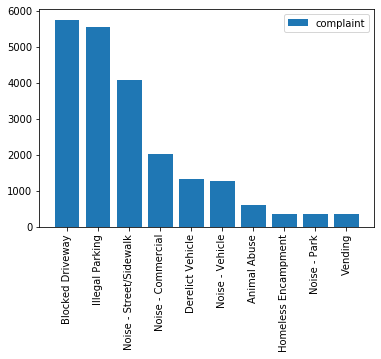

In [12]:
top10=sort_1.head(10)
x=range(10)
plt.bar(top10.Complaint_Type, top10.FREQ)
plt.xticks(x, top10.Complaint_Type, rotation='vertical')
plt.legend(['complaint'])
plt.show()


In [13]:
print(data_set.isnull().sum())

Created_Date                  164824
Closed_Date                   165084
Agency                        164824
Complaint_Type                164824
Location_Type                 164824
City                          165107
Facility_Type                 165084
Status                        164824
Due_Date                      164825
Resolution_Action_Upd_Date    165081
Borough                       164824
Park_Borough                  164824
dtype: int64


In [14]:
print(data_set.dtypes)

Created_Date                  object
Closed_Date                   object
Agency                        object
Complaint_Type                object
Location_Type                 object
City                          object
Facility_Type                 object
Status                        object
Due_Date                      object
Resolution_Action_Upd_Date    object
Borough                       object
Park_Borough                  object
dtype: object


In [15]:
data_set['City']=data_set['City'].fillna('Unknown')

In [16]:
data_set['City']

0         NEW YORK
1          ASTORIA
2            BRONX
3            BRONX
4         ELMHURST
            ...   
187117     Unknown
187118     Unknown
187119     Unknown
187120     Unknown
187121     Unknown
Name: City, Length: 187122, dtype: object

In [17]:
a=data_set['Facility_Type'].mode()[0]

In [18]:
a

'Precinct'

In [19]:
data_set['Facility_Type']=data_set['Facility_Type'].fillna(a)

In [20]:
data_set['Facility_Type']

0         Precinct
1         Precinct
2         Precinct
3         Precinct
4         Precinct
            ...   
187117    Precinct
187118    Precinct
187119    Precinct
187120    Precinct
187121    Precinct
Name: Facility_Type, Length: 187122, dtype: object

In [21]:
data_set['Location_Type']

0         Street/Sidewalk
1         Street/Sidewalk
2         Street/Sidewalk
3         Street/Sidewalk
4         Street/Sidewalk
               ...       
187117                NaN
187118                NaN
187119                NaN
187120                NaN
187121                NaN
Name: Location_Type, Length: 187122, dtype: object

In [22]:
b=data_set['Location_Type'].mode()[0]
print(b)

Street/Sidewalk


In [23]:
data_set['Location_Type']=data_set['Location_Type'].fillna(b)

In [24]:
data_set['Location_Type']

0         Street/Sidewalk
1         Street/Sidewalk
2         Street/Sidewalk
3         Street/Sidewalk
4         Street/Sidewalk
               ...       
187117    Street/Sidewalk
187118    Street/Sidewalk
187119    Street/Sidewalk
187120    Street/Sidewalk
187121    Street/Sidewalk
Name: Location_Type, Length: 187122, dtype: object

In [25]:
lbe=LabelEncoder()

In [26]:
data_set['Agency']=data_set['Agency'].fillna('Unknown')

In [27]:
data_set['Agency']=lbe.fit_transform(data_set['Agency'])

In [28]:
ct=data_set['Complaint_Type'].mode()[0]

In [29]:
ct

'Blocked Driveway'

In [30]:
data_set['Complaint_Type']=data_set['Complaint_Type'].fillna(ct)

In [31]:
data_set['Complaint_Type']

0         Noise - Street/Sidewalk
1                Blocked Driveway
2                Blocked Driveway
3                 Illegal Parking
4                 Illegal Parking
                   ...           
187117           Blocked Driveway
187118           Blocked Driveway
187119           Blocked Driveway
187120           Blocked Driveway
187121           Blocked Driveway
Name: Complaint_Type, Length: 187122, dtype: object

In [32]:
data_set['Complaint_Type']=lbe.fit_transform(data_set['Complaint_Type'])

In [33]:
data_set['Complaint_Type']

0         14
1          2
2          2
3         10
4         10
          ..
187117     2
187118     2
187119     2
187120     2
187121     2
Name: Complaint_Type, Length: 187122, dtype: int64

In [34]:
data_set['Location_Type']=lbe.fit_transform(data_set['Location_Type'])

In [35]:
data_set['Location_Type']

0         11
1         11
2         11
3         11
4         11
          ..
187117    11
187118    11
187119    11
187120    11
187121    11
Name: Location_Type, Length: 187122, dtype: int64

In [36]:
data_set['City']=lbe.fit_transform(data_set['City'])

In [37]:
data_set['City']

0         31
1          1
2          6
3          6
4         13
          ..
187117    46
187118    46
187119    46
187120    46
187121    46
Name: City, Length: 187122, dtype: int64

In [38]:
data_set['Facility_Type']=lbe.fit_transform(data_set['Facility_Type'])

In [39]:
br=data_set['Borough'].mode()[0]

In [40]:
br

'BROOKLYN'

In [41]:
data_set['Borough']=data_set['Borough'].fillna(br)

In [42]:
data_set['Borough']=lbe.fit_transform(data_set['Borough'])

In [43]:
pbr=data_set['Park_Borough'].mode()[0]

In [44]:
pbr

'BROOKLYN'

In [45]:
data_set['Park_Borough']=data_set['Park_Borough'].fillna(pbr)

In [46]:
sts=data_set['Status'].mode()[0]

In [47]:
sts


'Closed'

In [48]:
data_set['Status']=data_set['Status'].fillna('Unknown')

In [49]:
data_set['Park_Borough']=lbe.fit_transform(data_set['Park_Borough'])
data_set['Status']=lbe.fit_transform(data_set['Status'])


In [50]:
print(data_set.describe())

              Agency  Complaint_Type  Location_Type           City  \
count  187122.000000   187122.000000  187122.000000  187122.000000   
mean        0.880837        2.786722      10.913196      42.754369   
std         0.323981        2.806810       0.852035      10.072933   
min         0.000000        0.000000       0.000000       0.000000   
25%         1.000000        2.000000      11.000000      46.000000   
50%         1.000000        2.000000      11.000000      46.000000   
75%         1.000000        2.000000      11.000000      46.000000   
max         1.000000       20.000000      14.000000      50.000000   

       Facility_Type         Status        Borough   Park_Borough  
count       187122.0  187122.000000  187122.000000  187122.000000  
mean             0.0       2.761567       1.092164       1.092164  
std              0.0       0.649323       0.484333       0.484333  
min              0.0       0.000000       0.000000       0.000000  
25%              0.0       3.

In [51]:
print(data_set.dtypes)

Created_Date                  object
Closed_Date                   object
Agency                         int64
Complaint_Type                 int64
Location_Type                  int64
City                           int64
Facility_Type                  int64
Status                         int64
Due_Date                      object
Resolution_Action_Upd_Date    object
Borough                        int64
Park_Borough                   int64
dtype: object


In [52]:
data_set.drop(['Created_Date','Closed_Date','Due_Date','Resolution_Action_Upd_Date','Agency'],axis=1,inplace = True)
data_set.columns

Index(['Complaint_Type', 'Location_Type', 'City', 'Facility_Type', 'Status',
       'Borough', 'Park_Borough'],
      dtype='object')

In [53]:
data_set

,Complaint_Type,Location_Type,City,Facility_Type,Status,Borough,Park_Borough
0,14,11,31,0,1,2,2
1,2,11,1,0,1,3,3
2,2,11,6,0,1,0,0
3,10,11,6,0,1,0,0
4,10,11,13,0,1,3,3
...,...,...,...,...,...,...,...
187117,2,11,46,0,3,1,1
187118,2,11,46,0,3,1,1
187119,2,11,46,0,3,1,1
187120,2,11,46,0,3,1,1


In [54]:
status=data_set['Status']
status

0         1
1         1
2         1
3         1
4         1
         ..
187117    3
187118    3
187119    3
187120    3
187121    3
Name: Status, Length: 187122, dtype: int64

In [55]:
data_set.drop(['Status'],axis=1,inplace=True)
data_set

,Complaint_Type,Location_Type,City,Facility_Type,Borough,Park_Borough
0,14,11,31,0,2,2
1,2,11,1,0,3,3
2,2,11,6,0,0,0
3,10,11,6,0,0,0
4,10,11,13,0,3,3
...,...,...,...,...,...,...
187117,2,11,46,0,1,1
187118,2,11,46,0,1,1
187119,2,11,46,0,1,1
187120,2,11,46,0,1,1


In [56]:
data_set['Status']=status
data_set

,Complaint_Type,Location_Type,City,Facility_Type,Borough,Park_Borough,Status
0,14,11,31,0,2,2,1
1,2,11,1,0,3,3,1
2,2,11,6,0,0,0,1
3,10,11,6,0,0,0,1
4,10,11,13,0,3,3,1
...,...,...,...,...,...,...,...
187117,2,11,46,0,1,1,3
187118,2,11,46,0,1,1,3
187119,2,11,46,0,1,1,3
187120,2,11,46,0,1,1,3


In [57]:
x=data_set.iloc[:,0:6]

In [58]:
x

,Complaint_Type,Location_Type,City,Facility_Type,Borough,Park_Borough
0,14,11,31,0,2,2
1,2,11,1,0,3,3
2,2,11,6,0,0,0
3,10,11,6,0,0,0
4,10,11,13,0,3,3
...,...,...,...,...,...,...
187117,2,11,46,0,1,1
187118,2,11,46,0,1,1
187119,2,11,46,0,1,1
187120,2,11,46,0,1,1


In [59]:
y=data_set.iloc[:,6]

In [60]:
y

0         1
1         1
2         1
3         1
4         1
         ..
187117    3
187118    3
187119    3
187120    3
187121    3
Name: Status, Length: 187122, dtype: int64

In [61]:
print(y.isnull().sum())

0


In [62]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.3,random_state=42)

In [63]:
print(X_train.shape)

(130985, 6)


In [64]:
print(y_train.shape)

(130985,)


In [65]:
print(X_test.shape)

(56137, 6)


In [66]:
print(y_test.shape)

(56137,)


In [67]:
ss= StandardScaler()
XX_train=ss.fit_transform(X_train)
XX_test=ss.fit_transform(X_test)

In [68]:
print(len(y))

187122


In [69]:
print(math.sqrt(len(y_test)) )

236.93247983339052


In [70]:
category= KNeighborsClassifier(n_neighbors=20)
category.fit(XX_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [71]:
y_predict=category.predict(XX_test)
print(y_predict)

[3 3 3 ... 1 3 3]


In [72]:
accuracy_score(y_test,y_predict)

0.9992162032171296

In [73]:
data_set

,Complaint_Type,Location_Type,City,Facility_Type,Borough,Park_Borough,Status
0,14,11,31,0,2,2,1
1,2,11,1,0,3,3,1
2,2,11,6,0,0,0,1
3,10,11,6,0,0,0,1
4,10,11,13,0,3,3,1
...,...,...,...,...,...,...,...
187117,2,11,46,0,1,1,3
187118,2,11,46,0,1,1,3
187119,2,11,46,0,1,1,3
187120,2,11,46,0,1,1,3


In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,random_state=42,test_size=0.3)

In [76]:
dtclf=DecisionTreeClassifier(criterion='entropy')
dtclf.fit(X_train,y_train)
y_pred = dtclf.predict(X_test)
print(y_pred)


[3 3 3 ... 1 3 3]


In [77]:
print(accuracy_score(y_test,y_pred))

0.9992340167803766


In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[   29     1    10     0]
 [    1  6517     5     0]
 [   25     1    21     0]
 [    0     0     0 49527]]


In [79]:
y_predict=category.predict(XX_test)
print(y_predict)

[3 3 3 ... 1 3 3]


In [80]:
accuracy_score(y_test,y_predict)

0.9992162032171296

In [81]:
data_set

,Complaint_Type,Location_Type,City,Facility_Type,Borough,Park_Borough,Status
0,14,11,31,0,2,2,1
1,2,11,1,0,3,3,1
2,2,11,6,0,0,0,1
3,10,11,6,0,0,0,1
4,10,11,13,0,3,3,1
...,...,...,...,...,...,...,...
187117,2,11,46,0,1,1,3
187118,2,11,46,0,1,1,3
187119,2,11,46,0,1,1,3
187120,2,11,46,0,1,1,3


In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,random_state=42,test_size=0.3)

In [84]:
dtclf=DecisionTreeClassifier(criterion='entropy')
dtclf.fit(X_train,y_train)
y_pred = dtclf.predict(X_test)
print(y_pred)


[3 3 3 ... 1 3 3]


In [85]:
print(accuracy_score(y_test,y_pred))

0.9992340167803766


In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[   29     1    10     0]
 [    1  6517     5     0]
 [   25     1    21     0]
 [    0     0     0 49527]]
